In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap

from PIL import Image

2022-01-04 14:13:43.415208: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-04 14:13:43.415229: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
df = pd.read_csv('/home/walml/repos/morphology-tools/temp_latest_forest_df.csv')
len(df)

59727

In [4]:
df.head()

,Residual_90,Residual_80,Residual_70,Residual_60,Residual_50,Residual_0,Offset_90,Offset_80,Offset_70,Offset_60,...,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6,t06_odd_a14_yes_fraction_kaggle
0,0.000868,0.002130,0.004461,0.005991,0.010535,0.043532,0.0,0.519510,2.558382,3.257949,...,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512,0.054453
1,0.000884,0.003260,0.003799,0.004027,0.005774,0.087014,0.0,2.205243,1.046447,1.878556,...,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000,0.189149
2,0.001240,0.003004,0.005173,0.007927,0.016231,0.082708,0.0,0.926676,2.401440,0.987059,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
3,0.000712,0.002820,0.004650,0.008038,0.008700,0.036078,0.0,4.413643,5.084836,8.874831,...,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000,0.320398
4,0.000996,0.002776,0.003549,0.004183,0.004945,0.044906,0.0,0.020824,1.214960,1.086090,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.029383


In [5]:
df['file_loc'] = df['objid'].apply(lambda x: '/home/walml/repos/morphology-tools/anomaly/data/images_training_rev1/' + str(x) + '.jpg')
df['file_loc'].iloc[0]

'/home/walml/repos/morphology-tools/anomaly/data/images_training_rev1/100008.jpg'

In [5]:
# df = df[:1000]

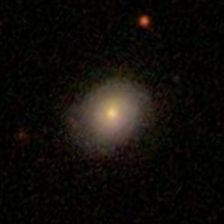

In [6]:
im = Image.open(df.iloc[0]['file_loc']).resize((300, 300)).crop((38, 38, 300-38, 300-38))
im

In [7]:
def load_image(loc, final_resize=128):
    return np.array(Image.open(loc).resize((300, 300)).crop((38, 38, 300-38, 300-38)).resize((final_resize, final_resize))).mean(axis=2)

In [8]:
final_resize = 64
images = np.zeros((len(df), final_resize, final_resize), dtype=np.float32)

for loc_n, loc in enumerate(df['file_loc']):
    images[loc_n] = load_image(loc, final_resize=final_resize)

In [9]:
images.shape

(59727, 64, 64)

In [10]:
reducer = umap.UMAP(n_components=40)

embedding = reducer.fit_transform(images.reshape(len(images), -1))

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [11]:
embedding.shape

(59727, 40)

In [12]:
embed_df = pd.DataFrame(data=embedding, columns=[f'umap_feat_{n}' for n in range(40)])
embed_df['iauname'] = df['objid']
embed_df['t06_odd_a14_yes_fraction_kaggle'] = df['t06_odd_a14_yes_fraction_kaggle']

In [13]:
embed_df.head()

,umap_feat_0,umap_feat_1,umap_feat_2,umap_feat_3,umap_feat_4,umap_feat_5,umap_feat_6,umap_feat_7,umap_feat_8,umap_feat_9,...,umap_feat_31,umap_feat_32,umap_feat_33,umap_feat_34,umap_feat_35,umap_feat_36,umap_feat_37,umap_feat_38,umap_feat_39,iauname
0,4.804852,0.275579,2.504609,3.945949,3.435435,8.515339,5.023671,4.404952,5.117863,4.464729,...,5.566695,5.414181,5.210829,4.948691,5.246625,4.000315,5.286035,4.176804,5.433060,100008
1,4.837403,0.461968,4.245256,2.019407,4.386377,8.298850,5.634002,4.129690,5.065094,3.777586,...,5.679322,5.601509,5.291425,4.983991,5.263177,4.006851,5.204205,4.184542,5.322272,100023
2,6.263625,0.324933,3.223352,2.471719,4.241744,8.275194,5.420960,4.370922,5.292275,3.968160,...,5.778037,5.553529,5.305914,5.000113,5.298342,4.052004,5.213145,4.184338,5.357298,100053
3,2.345619,0.703011,2.669875,3.141941,3.676066,7.100838,5.213402,4.307633,5.177524,4.226579,...,5.460083,5.434441,5.180253,4.892195,5.203552,4.073342,5.075733,4.211193,5.437367,100078
4,3.085394,0.758046,2.992627,2.934125,3.758272,6.878838,5.319174,4.227458,5.179847,4.057440,...,5.630462,5.611078,5.015814,4.948229,5.269480,4.104390,4.990104,4.086639,5.371837,100090


In [14]:
embed_df.to_parquet('temp_latest_forest_df_umap_40.parquet', index=False)

In [2]:
# embed_df = pd.read_parquet('temp_latest_forest_df_umap_40.parquet')

In [7]:
# embed_df.to_parquet('temp_latest_forest_df_umap_40.parquet', index=False)